# Week 1 - 26 Nov 2025
In week 1 - on 26 Nov 2025 - I used the following pieces of code to do a brief data exploration of the initial data provided for the Capstone Project <br>
The following code has been executed through Google Colab using Google Drive to read the initial data files.

### What has been done here
In this week I chose to query the central points for each of the functions.<br>
So I've explored the initial data provided for each function to find out the range of the inputs spaces<br>
I've noticed that each function has its inputs between the values 0 and 1, so the central points for each space would have a value of 0.5 for each of the dimensions / features <br>
So I've chosen to query the points given by the value 0.5 for each dimension, in all the functions.<br>
The initial data exploration was used to determine the values for the central points of each function domain and ensure that these were not included in the given dataset already.


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from scipy.stats import norm


In [ ]:
#inputs = np.load('/content/sample_data/initial_inputs.npy')
#outputs = np.load('/content/sample_data/initial_outputs.npy')

input2 = np.load('/content/drive/MyDrive/Capstone_Project/initial_data/function_8/initial_inputs.npy')
output2 = np.load('/content/drive/MyDrive/Capstone_Project/initial_data/function_8/initial_outputs.npy')
print(input2)
print(output2)

[[0.60499445 0.29221502 0.90845275 0.35550624 0.20166872 0.57533801
  0.31031095 0.73428138]
 [0.17800696 0.56622265 0.99486184 0.21032501 0.32015266 0.70790879
  0.63538449 0.10713163]
 [0.00907698 0.81162615 0.52052036 0.07568668 0.26511183 0.09165169
  0.59241515 0.36732026]
 [0.50602816 0.65373012 0.36341078 0.17798105 0.0937283  0.19742533
  0.7558269  0.29247234]
 [0.35990926 0.24907568 0.49599717 0.70921498 0.11498719 0.28920692
  0.55729515 0.59388173]
 [0.77881834 0.0034195  0.33798313 0.51952778 0.82090699 0.53724669
  0.5513471  0.66003209]
 [0.90864932 0.0622497  0.23825955 0.76660355 0.13233596 0.99024381
  0.68806782 0.74249594]
 [0.58637144 0.88073573 0.74502075 0.54603485 0.00964888 0.74899176
  0.23090707 0.09791562]
 [0.76113733 0.85467239 0.38212433 0.33735198 0.68970832 0.30985305
  0.63137968 0.04195607]
 [0.9849332  0.69950626 0.9988855  0.18014846 0.58014315 0.23108719
  0.49082694 0.31368272]
 [0.11207131 0.43773566 0.59659878 0.59277563 0.22698177 0.41010452
  

In [ ]:
print(inputs)
print(outputs)

[[0.31940389 0.76295937]
 [0.57432921 0.8798981 ]
 [0.73102363 0.73299988]
 [0.84035342 0.26473161]
 [0.65011406 0.68152635]
 [0.41043714 0.1475543 ]
 [0.31269116 0.07872278]
 [0.68341817 0.86105746]
 [0.08250725 0.40348751]
 [0.88388983 0.58225397]]
[ 1.32267704e-079  1.03307824e-046  7.71087511e-016  3.34177101e-124
 -3.60606264e-003 -2.15924904e-054 -2.08909327e-091  2.53500115e-040
  3.60677119e-081  6.22985647e-048]


[np.float64(0.31940388883889725), np.float64(0.5743292145098291), np.float64(0.7310236309563586), np.float64(0.8403534169072556), np.float64(0.6501140597987644), np.float64(0.41043713662518566), np.float64(0.31269115679477755), np.float64(0.6834181688515067), np.float64(0.08250725182080587), np.float64(0.8838898288181171)]
[np.float64(0.7629593742689353), np.float64(0.879898104984359), np.float64(0.7329998764152272), np.float64(0.26473161399676703), np.float64(0.6815263520602101), np.float64(0.14755429902998185), np.float64(0.07872277794971883), np.float64(0.8610574643936101), np.float64(0.403487506426324), np.float64(0.5822539743824439)]
[ 1.32267704e-079  1.03307824e-046  7.71087511e-016  3.34177101e-124
 -3.60606264e-003 -2.15924904e-054 -2.08909327e-091  2.53500115e-040
  3.60677119e-081  6.22985647e-048]


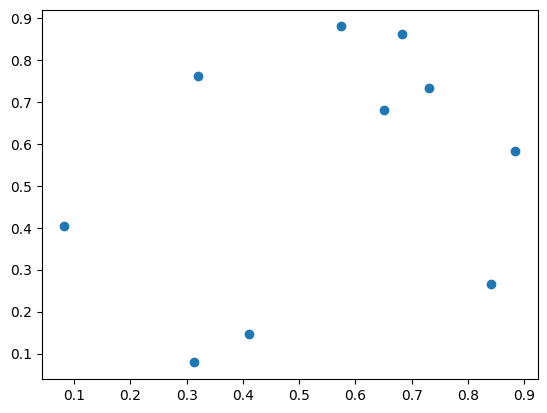

In [ ]:
x = []
y = []
for i in inputs:
  x.append(i[0])
  y.append(i[1])

print(x)
print(y)
print(outputs)
plt.scatter(x,y)
plt.show()

In [ ]:
rbf_lengthscale = [0.1, 0.1]
real_noise_std = 1e-10
noise_assumption = 1e-10

#Acquisition function parameter
beta = 1.96


#Define kernel of GP
kernel = RBF(length_scale=rbf_lengthscale, length_scale_bounds='fixed')
#model = GaussianProcessRegressor(kernel = kernel, alpha=noise_assumption)

#Initialise query lists and maximum observations
X, Y = inputs, outputs

#Initialise grid for plots
x_grid = np.linspace(0, 1, 101).reshape(-1,1)
x_grid = np.mgrid[0:1:0.01, 0:1:0.01]
print(x_grid)

model = GaussianProcessRegressor(kernel = kernel)
#Fit the model
model.fit(np.array(X).reshape(-1, 1), np.array(Y).reshape(-1, 1))


#Calculate the mean and standard deviation and make them one-dimensional for plotting
post_mean, post_std = model.predict(x_grid, return_std=True)
#post_mean, post_std = post_mean.squeeze(), post_std.squeeze()

acquisition_function = post_mean + beta * post_std

grid = x_grid.squeeze()
x = grid[np.argmax(acquisition_function)] #Else use the acquisition function

#Append data, calculate function and sort lists according to observation values
X.append(x)
y = calc_function(x) + np.random.normal(scale = real_noise_std)
Y.append(y)
X = [x for _, x in sorted(zip(Y, X), reverse = True)]
Y.sort(reverse = True)


[[[0.   0.   0.   ... 0.   0.   0.  ]
  [0.01 0.01 0.01 ... 0.01 0.01 0.01]
  [0.02 0.02 0.02 ... 0.02 0.02 0.02]
  ...
  [0.97 0.97 0.97 ... 0.97 0.97 0.97]
  [0.98 0.98 0.98 ... 0.98 0.98 0.98]
  [0.99 0.99 0.99 ... 0.99 0.99 0.99]]

 [[0.   0.01 0.02 ... 0.97 0.98 0.99]
  [0.   0.01 0.02 ... 0.97 0.98 0.99]
  [0.   0.01 0.02 ... 0.97 0.98 0.99]
  ...
  [0.   0.01 0.02 ... 0.97 0.98 0.99]
  [0.   0.01 0.02 ... 0.97 0.98 0.99]
  [0.   0.01 0.02 ... 0.97 0.98 0.99]]]


ValueError: Found input variables with inconsistent numbers of samples: [20, 10]